Vibration Analysis
=================== 

Analysing vibration events


1. Import all the necessary library to process:
------------------------------------------------

In [1]:
#importing libraries for plotting
%matplotlib inline
import matplotlib.pyplot as plt
import json
import math
import numpy as np



2. Helper code for processing the data
---------------------------------------

In [2]:
def splitAndConvert(value,splitter = ' '):
	return map(float,value.split(splitter))

def getRMSData(x,y,z):
	return [ math.sqrt((x[i]*x[i])+(y[i]*y[i])+(z[i]*z[i]))  for i in xrange(0,2048)]


def loadEvents():
	events = []
	with open('vibration.json') as data_file:    
	    	for line in data_file:
			event = json.loads(line)
			event['x'] =  splitAndConvert(event['value']['x']);
			event['y'] =  splitAndConvert(event['value']['y']);
			event['z'] =  splitAndConvert(event['value']['z']);
			event['rms'] = getRMSData(event['x'],event['y'],event['z'])
			del event['value'];
			events.append(event)
	return events


def processPSD(events, axis):
	psds = []
	for event in events:
		signal = np.array(event[axis], dtype=float)
		fourier = np.fft.fft(signal*np.hanning(2048))
		psd = 2*((fourier.real * fourier.real)/(1600*2048)) 
		psds.append(psd)
	return psds


def consolidatePSD(psds):
		dArray = np.array(psds)
		#print 'Data type                :', dArray.dtype
		#print 'Total number of elements :', dArray.size
		#print 'Number of dimensions     :', dArray.ndim
		#print 'Shape (dimensionality)   :', dArray.shape
		#print 'Memory used (in bytes)   :', dArray.nbytes
		vibrationTable = []
		for i in xrange(0,2048):
			vibrationTable.append(np.sum(dArray[:,i])/len(psds))

		return vibrationTable

def processData():
	events = loadEvents()
	table = {}
	table['x'] = consolidatePSD(processPSD(events,'x'))
	table['y'] = consolidatePSD(processPSD(events,'y'))
	table['z'] = consolidatePSD(processPSD(events,'z'))
	table['rms'] = consolidatePSD(processPSD(events,'rms'))
	return table



3. Display sample data for 3 axis
-----------------------------------

No of Events recorded : 334


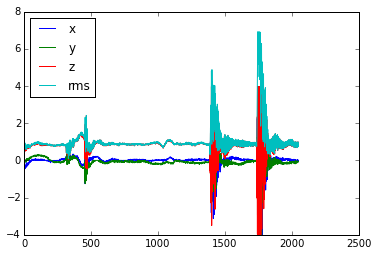

In [3]:
data = loadEvents()
print "No of Events recorded :", len(data) 
plt.plot (data[0]['x'], label="x")
plt.plot (data[0]['y'], label="y")
plt.plot (data[0]['z'], label="z")
plt.plot (data[0]['rms'],  label="rms")
plt.legend(loc='upper left')


4. Display a sample signal with hanning window and after psd analysis
----------------------------------------------------------------------

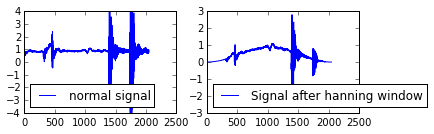

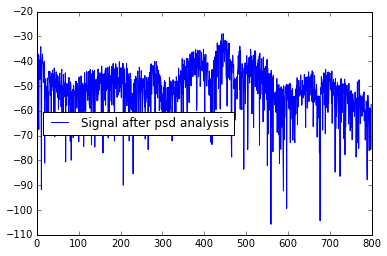

In [4]:
import numpy as np
signal = np.array(data[0]['z'], dtype=float)
plt.subplot(2,2,1)
plt.plot(signal,label="normal signal")
plt.legend(loc='lower left')
plt.subplot(2,2,2)
plt.plot(signal* np.hanning(2048),label="Signal after hanning window")
plt.legend(loc='lower left')
plt.figure()
fourier = np.fft.fft(signal*np.hanning(2048))
n = signal.size-3
timestep = 0.000625
freq = np.fft.fftfreq(n, d=timestep)
psd = (fourier.real * fourier.real)/(1600*2048) 
psd  = np.array(psd, dtype=float)
psd[2:n-1] =  2* psd[2:n-1]
plt.plot(freq[2:n/2], 10*np.log10(psd[2:n/2]),label="Signal after psd analysis")
plt.legend(loc='center left')

5. Consolidating the report 
---------------------------

('trapezoidal area x=', 0.12360196506596299)
('Simpson x =', 0.12375189082977331)
('trapezoidal area y=', 0.1416781518529569)
('Simpson y =', 0.1417611851789779)
('trapezoidal area z=', 0.32075644988274854)
('Simpson z =', 0.32102093319348385)
('trapezoidal area rms=', 0.29523818043622763)
('Simpson rms =', 0.29480228984341683)


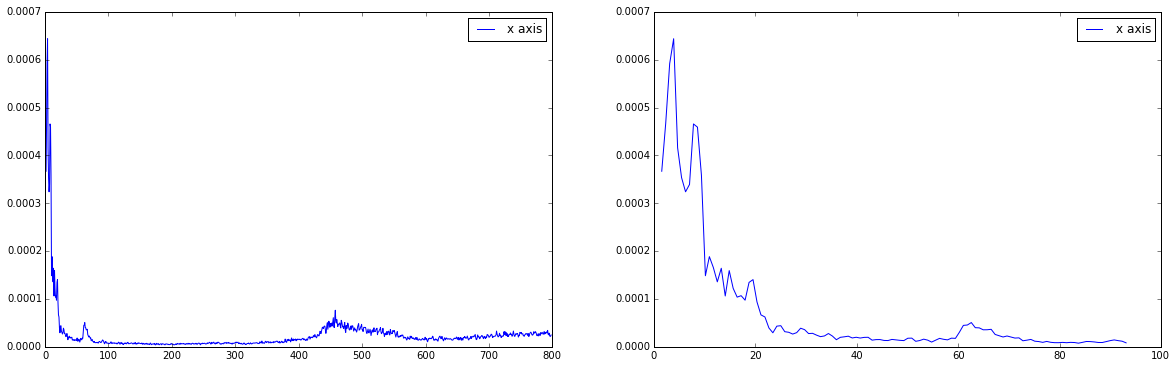

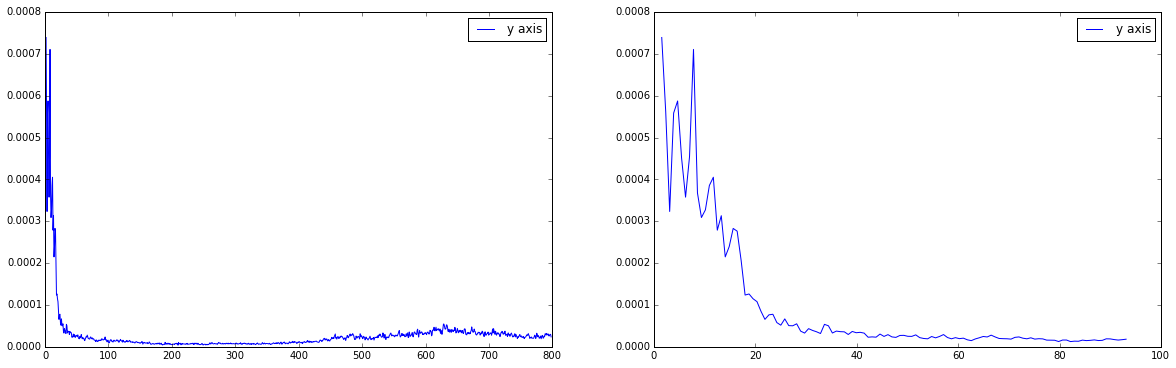

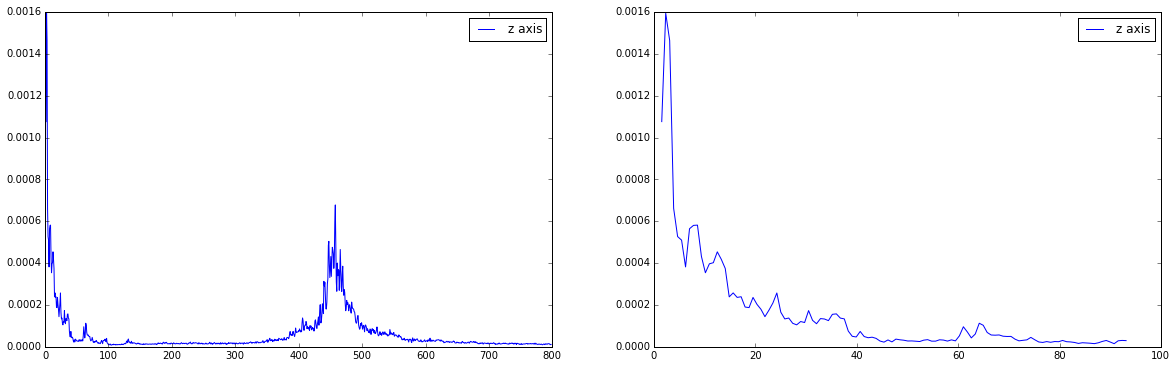

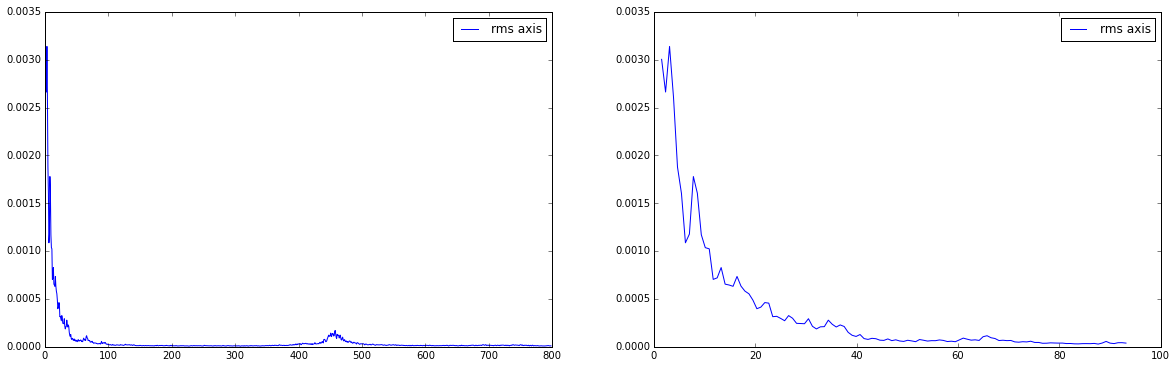

In [5]:
data = processData()
from scipy.integrate import simps, trapz
graph = data['x'][2:n/2-1]
# Compute the area using the composite trapezoidal rule.
area = trapz(graph, dx=5)
print("trapezoidal area x=", area)

# Compute the area using the composite Simpson's rule.
area = simps(graph, dx=5)
print("Simpson x =", area)

graph = data['y'][2:n/2-1]
# Compute the area using the composite trapezoidal rule.
area = trapz(graph, dx=5)
print("trapezoidal area y=", area)

# Compute the area using the composite Simpson's rule.
area = simps(graph, dx=5)
print("Simpson y =", area)

graph = data['z'][2:n/2-1]
# Compute the area using the composite trapezoidal rule.
area = trapz(graph, dx=5)
print("trapezoidal area z=", area)

# Compute the area using the composite Simpson's rule.
area = simps(graph, dx=5)
print("Simpson z =", area)

graph = data['rms'][2:n/2-1]
# Compute the area using the composite trapezoidal rule.
area = trapz(graph, dx=5)
print("trapezoidal area rms=", area)

# Compute the area using the composite Simpson's rule.
area = simps(graph, dx=5)
print("Simpson rms =", area)

n = signal.size-3
timestep = 0.000625
freq = np.fft.fftfreq(n, d=timestep)
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plt.plot(freq[2:n/2-1], data['x'][2:n/2-1],label = 'x axis' )
plt.legend(loc='upper right')
plt.subplot(1,2,2)
plt.plot(freq[2:120], data['x'][2:120],label = 'x axis' )
plt.legend(loc='upper right')
plt.show()
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plt.plot(freq[2:n/2-1], data['y'][2:n/2-1],label = 'y axis' )
plt.legend(loc='upper right')
plt.subplot(1,2,2)
plt.plot(freq[2:120], data['y'][2:120],label = 'y axis' )
plt.legend(loc='upper right')
plt.show()
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plt.plot(freq[2:n/2-1], data['z'][2:n/2-1],label = 'z axis' )
plt.legend(loc='upper right')
plt.subplot(1,2,2)
plt.plot(freq[2:120], data['z'][2:120],label = 'z axis' )
plt.legend(loc='upper right')
plt.show()
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plt.plot(freq[2:n/2-1], data['rms'][2:n/2-1],label = 'rms axis' )
plt.legend(loc='upper right')
plt.subplot(1,2,2)
plt.plot(freq[2:120], data['rms'][2:120],label = 'rms axis' )
plt.legend(loc='upper right')
plt.show()




